In [6]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal, stats
from scipy.fftpack import fft, ifft, fftfreq
import pickle

Here we will attempt to extract the long-term trend of uptake and CO2 concentration timeseries by applying a low pass filter to the original annual (and monthly) timeseries to remove the interannual time scales and shorter.

# Sample model case

## GCP data

In [7]:
df = pd.read_csv("./../Output/output_raw/output_GCP.csv", index_col="Year")
x = df.index.values
y = df["land"].values

In [8]:
freqs, X = signal.welch(y)

(0.0001, 100.0)

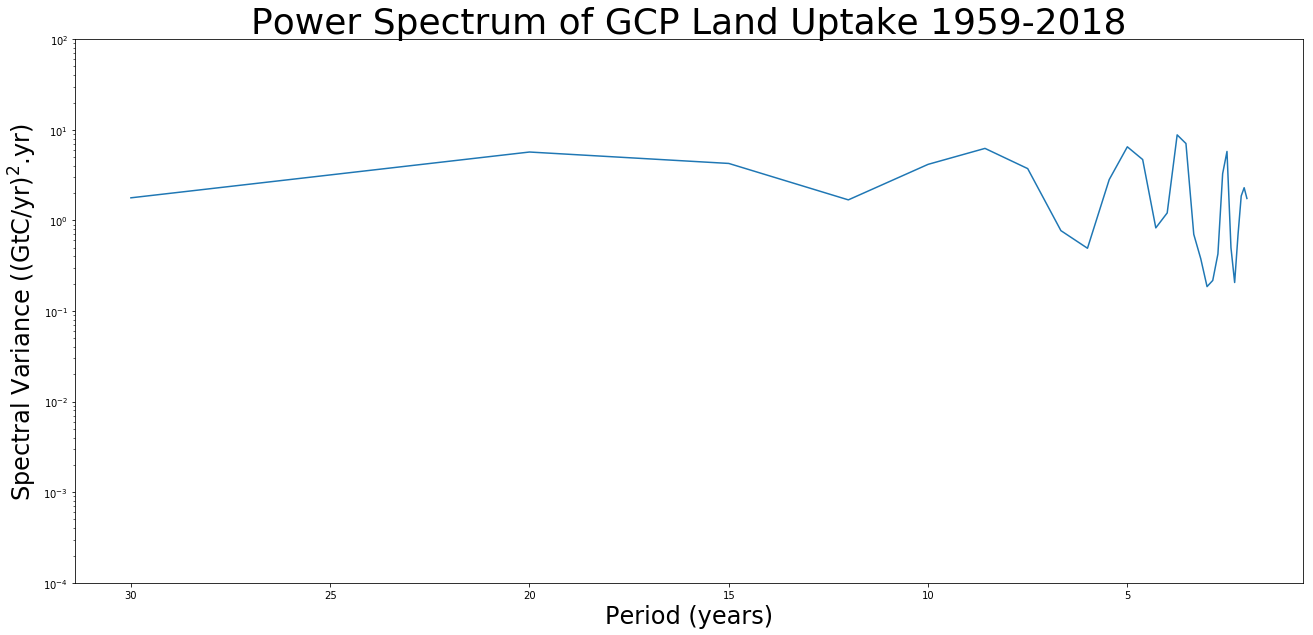

In [9]:
plt.figure(figsize=(22,10))

plt.semilogy(1/freqs[2:], X[2:])

plt.title("Power Spectrum of GCP Land Uptake 1959-2018", fontsize=36)
plt.gca().invert_xaxis()
plt.xlabel("Period (years)", fontsize=24)
plt.ylabel("Spectral Variance ((GtC/yr)$^2$.yr)", fontsize=24)
plt.ylim([10e-5, 10e1])

In [10]:
pd.DataFrame({"Period (yrs)": 1/freqs, "Spectral Variance": X}, index=freqs)

/home/student.unimelb.edu.au/rursino/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


,Period (yrs),Spectral Variance
0.000000,inf,1.394261
0.016667,60.000000,9.003595
0.033333,30.000000,1.775211
0.050000,20.000000,5.684921
0.066667,15.000000,4.252835
0.083333,12.000000,1.684954
0.100000,10.000000,4.154424
0.116667,8.571429,6.233548
0.133333,7.500000,3.729661
0.150000,6.666667,0.770890


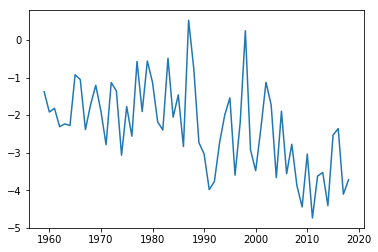

In [11]:
plt.plot(x,y)

(0.0001, 100.0)

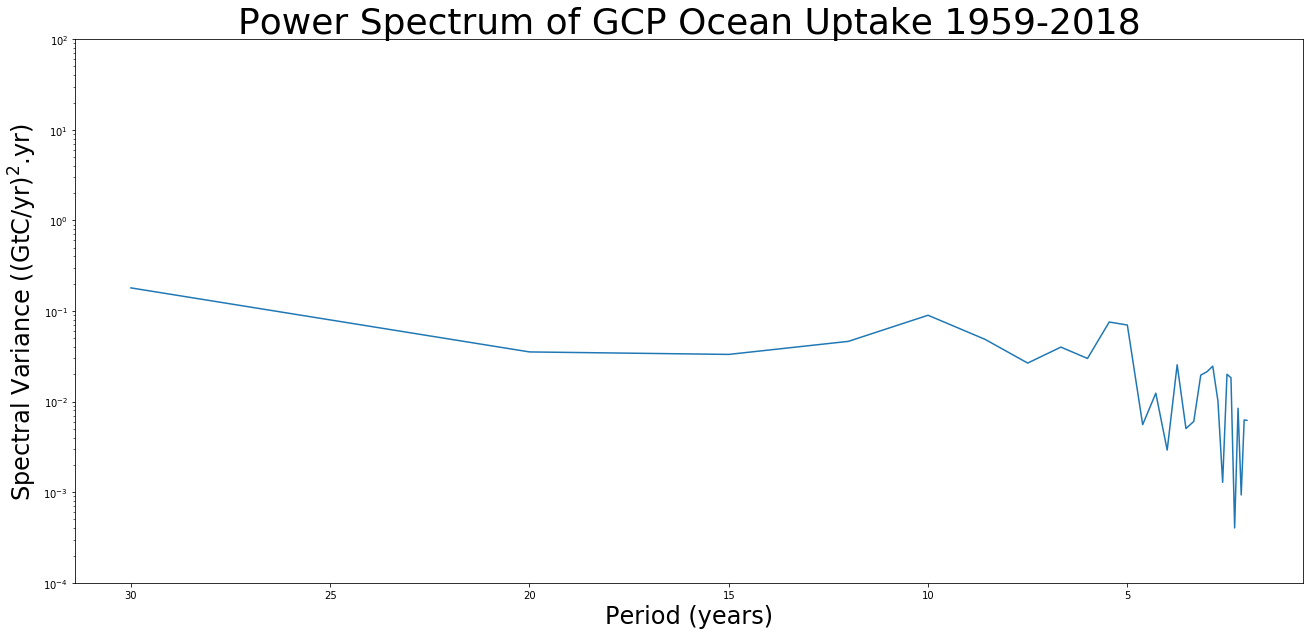

In [12]:
y_ocean = df["ocean"].values
freqs_ocean, X_ocean = signal.welch(y_ocean)


plt.figure(figsize=(22,10))

plt.semilogy(1/freqs_ocean[2:], X_ocean[2:])

plt.title("Power Spectrum of GCP Ocean Uptake 1959-2018", fontsize=36)
plt.gca().invert_xaxis()
plt.xlabel("Period (years)", fontsize=24)
plt.ylabel("Spectral Variance ((GtC/yr)$^2$.yr)", fontsize=24)
plt.ylim([10e-5, 10e1])

In [13]:
pd.DataFrame({"Period (yrs)": 1/freqs_ocean, "Spectral Variance": X_ocean}, index=freqs_ocean)

/home/student.unimelb.edu.au/rursino/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


,Period (yrs),Spectral Variance
0.000000,inf,0.052563
0.016667,60.000000,2.688065
0.033333,30.000000,0.179960
0.050000,20.000000,0.035339
0.066667,15.000000,0.033179
0.083333,12.000000,0.046222
0.100000,10.000000,0.089738
0.116667,8.571429,0.048685
0.133333,7.500000,0.026625
0.150000,6.666667,0.039954


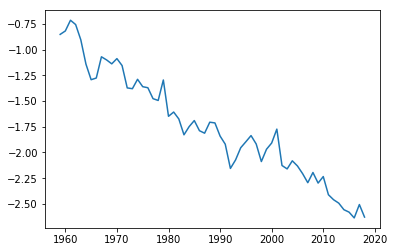

In [14]:
plt.plot(x,y_ocean)

## Monthly model data

In [15]:
df_monthly = pickle.load(open("./../Output/output_raw/output_all/JENA_s76_all/spatial.pik", "rb"))

/home/student.unimelb.edu.au/rursino/anaconda3/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [16]:
df_monthly.time

<xarray.DataArray 'time' (time: 504)>
array([cftime.Datetime360Day(1976, 1, 16, 0, 0, 0, 0, 0, 16),
       cftime.Datetime360Day(1976, 2, 16, 0, 0, 0, 0, 2, 46),
       cftime.Datetime360Day(1976, 3, 16, 0, 0, 0, 0, 4, 76), ...,
       cftime.Datetime360Day(2017, 10, 16, 0, 0, 0, 0, 1, 286),
       cftime.Datetime360Day(2017, 11, 16, 0, 0, 0, 0, 3, 316),
       cftime.Datetime360Day(2017, 12, 16, 0, 0, 0, 0, 5, 346)], dtype=object)
Coordinates:
  * time     (time) object 1976-01-16 00:00:00 ... 2017-12-16 00:00:00

In [17]:
x_month = np.arange(1976,2018,1./12)
y_month = df_monthly.Earth_Land.values

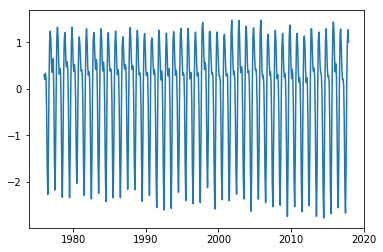

In [18]:
plt.plot(x_month, y_month)

In [19]:
freqs_month, X_month = signal.welch(y_month)

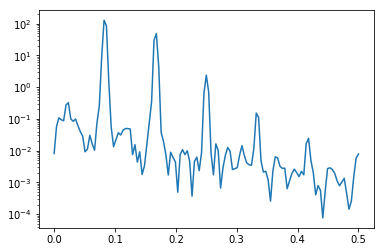

In [20]:
plt.semilogy(freqs_month, X_month)

In [21]:
pd.DataFrame({"Period (months)": 1/freqs_month, "Spectral Variance": X_month}, index=freqs_month).head(60);

/home/student.unimelb.edu.au/rursino/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


Spikes at 6 and 12 month (or half yearly and yearly) periods. This is as we'd expect knowing that their are respiration and photosynthesis periods every year.

In [22]:
def spectral_analysis(x, y, plot="loglog"):
    
    """
    plot options: plot, semilogy, loglog
    """
    
    plt.figure(figsize=(12,9))
    plt.subplot(211)
    plt.plot(x,y)
    
    freqs, spec = signal.welch(y)
    plt.subplot(212)
    
    if plot == "plot":
        plt.plot(freqs, spec)
    elif plot == "semilogy":
        plt.semilogy(freqs, spec)
    elif plot == "loglog":
        plt.loglog(freqs, spec)
    else:
        return "Please input either plot, semilogy or loglog for plot input."
    
    return pd.DataFrame({"Period (months)": 1/freqs, "Spectral Variance": spec}, index=freqs)

/home/student.unimelb.edu.au/rursino/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide


,Period (months),Spectral Variance
0.000000,inf,0.008072
0.003906,256.000000,0.057071
0.007812,128.000000,0.107880
0.011719,85.333333,0.093876
0.015625,64.000000,0.087338
...,...,...
0.484375,2.064516,0.000143
0.488281,2.048000,0.000257
0.492188,2.031746,0.001480
0.496094,2.015748,0.005813


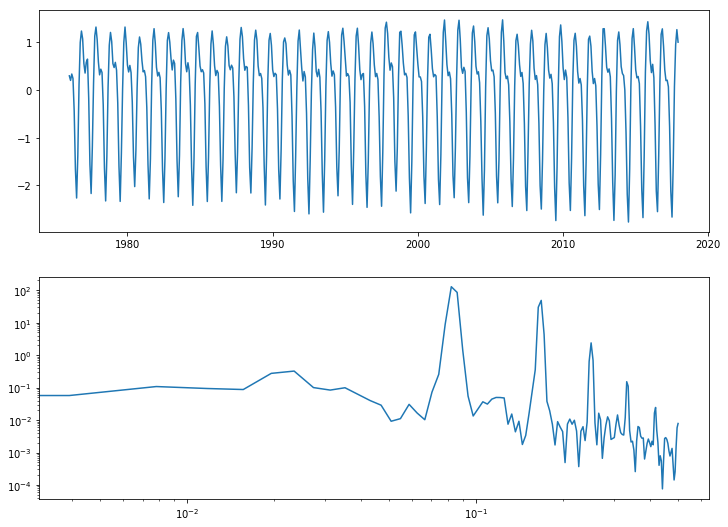

In [23]:
spectral_analysis(x_month, y_month)

In [24]:
def deseasonalise(x, y):
    
    mean_list = []
    for i in range(12):
        indices = range(i, len(y)+i, 12)
        sub = y[indices]
        mean_list.append(np.mean(sub))
    
    s = []
    for i in range(int(len(y)/12)):
        for j in mean_list:
            s.append(j)
    s = np.array(s)
    
    deseasonalised_y = y - (s-np.mean(s))
    
    plt.figure(figsize = (16,9))
    plt.plot(x, deseasonalised_y, label="deseasonalised")
    plt.plot(x, y, label="land")
    plt.legend()
    
    return deseasonalised_y

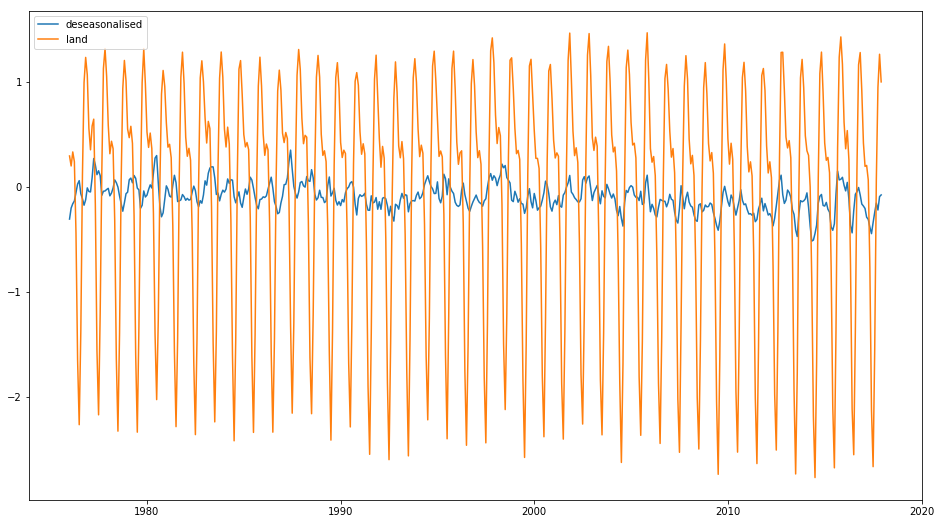

In [25]:
y_des = deseasonalise(x_month, y_month)

/home/student.unimelb.edu.au/rursino/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide


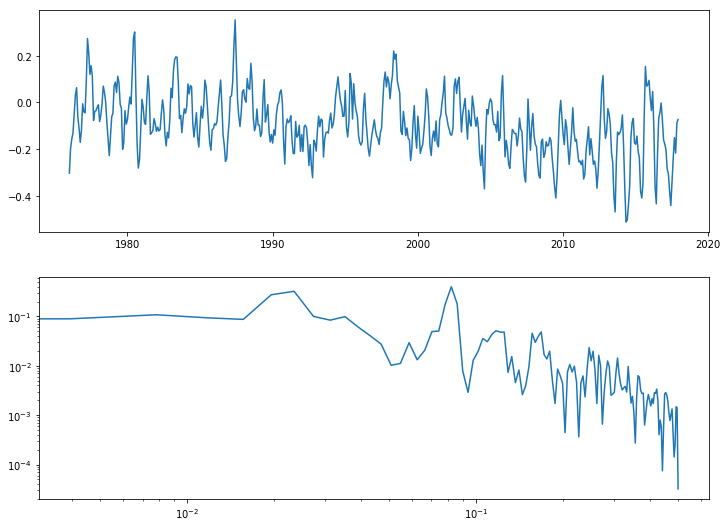

In [26]:
des_sample = spectral_analysis(x_month, y_des)["Spectral Variance"].values

/home/student.unimelb.edu.au/rursino/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide


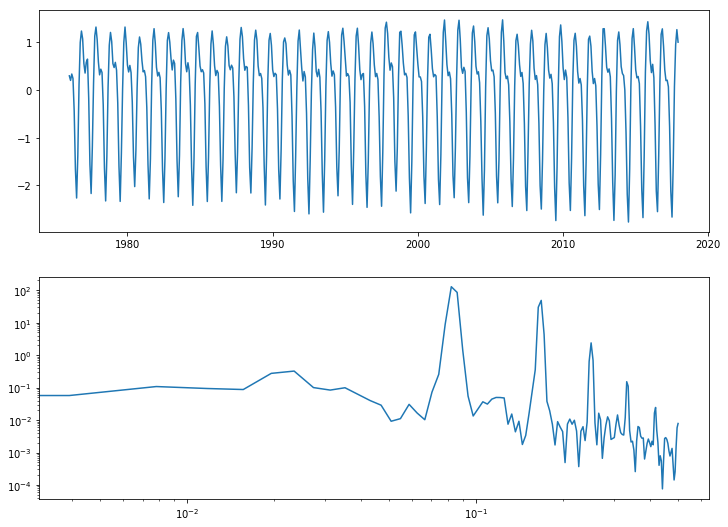

In [27]:
normal_sample = spectral_analysis(x_month, y_month)["Spectral Variance"].values

(0, 1)

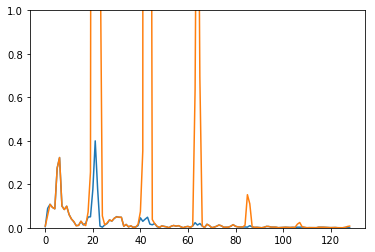

In [28]:
plt.plot(des_sample)
plt.plot(normal_sample)
plt.ylim([0,1])

In [29]:
1/(12*freqs_month[np.where((normal_sample > 1))])

array([1.06666667, 1.01587302, 0.96969697, 0.92753623, 0.50793651,
       0.49612403, 0.48484848, 0.33333333])

In [30]:
1/(12*freqs_month[np.where((normal_sample > 0.2) & (normal_sample < 0.7))])

array([4.26666667, 3.55555556, 1.12280702, 0.5203252 , 0.33862434,
       0.32820513])

Spikes at 1 year, 1/2 year and 4 months. They are removed well with the current deseasonalisation method. Other frequencies below 1/year are not removed, however, meaning that there is still some variance. Low pass filtering could remove all frequencies rather than just the 3 spikes. This may not be necessary.

Local spike at around 3.5-4 year periods. Most likely attributed to the interannual variability of uptake, which is effectively the rough cycle of ENSO.

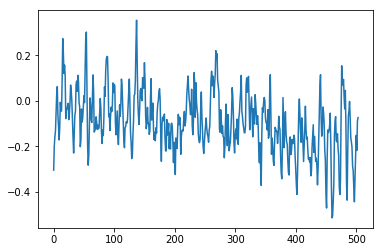

In [31]:
plt.plot(y_des)